
# M.ª de los Ángeles Martín de la Cruz.

# Actividad 3.5 – Clasificación de vinos (red-wine)

## 1. Importación de los datasets

### Descargar y Extraer el archivo ZIP desde GitHub

Descargamos el archivo ZIP desde GitHub.
Lo descomprimimos en una carpeta llamada "dataset_wine".
Listamos los archivos extraídos para asegurarnos de que el CSV está ahí.

In [2]:
import requests
import zipfile
import io

# URL del archivo ZIP en GitHub (obtener el enlace "Raw", cambiamos blob por raw)
zip_url = "https://github.com/sntamaria/Actividad-3.5-Clasificaci-n-de-vinos-/raw/main/wine%2Bquality.zip"

# Descargar el archivo ZIP
response = requests.get(zip_url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Extraer todos los archivos en una carpeta temporal
zip_file.extractall("dataset_wine")

# Listar los archivos extraídos
import os
print(os.listdir("dataset_wine"))


['winequality-red.csv', 'winequality.names', 'winequality-white.csv']


### Cargar el CSV de vinos tintos

In [3]:
import pandas as pd

# Cargar el archivo CSV con el separador correcto (por defecto asume que es una coma, por eso hay que indicarlo)
df = pd.read_csv("dataset_wine/winequality-red.csv", sep=";")

# Comprobamos las columnas y tipos de datos
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

### Limpieza y preparación del dataset

#### Comprobamos si hay valores nulos:

In [4]:
# Comprobar si hay valores nulos
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Si hay muchos valores nulos en una columna se podría eliminar la columna, si hay pocos se remplazarían con la media, la moda, la mediana o algún otro valor.

En este caso vemos que no hay valores nulos en el dataset.

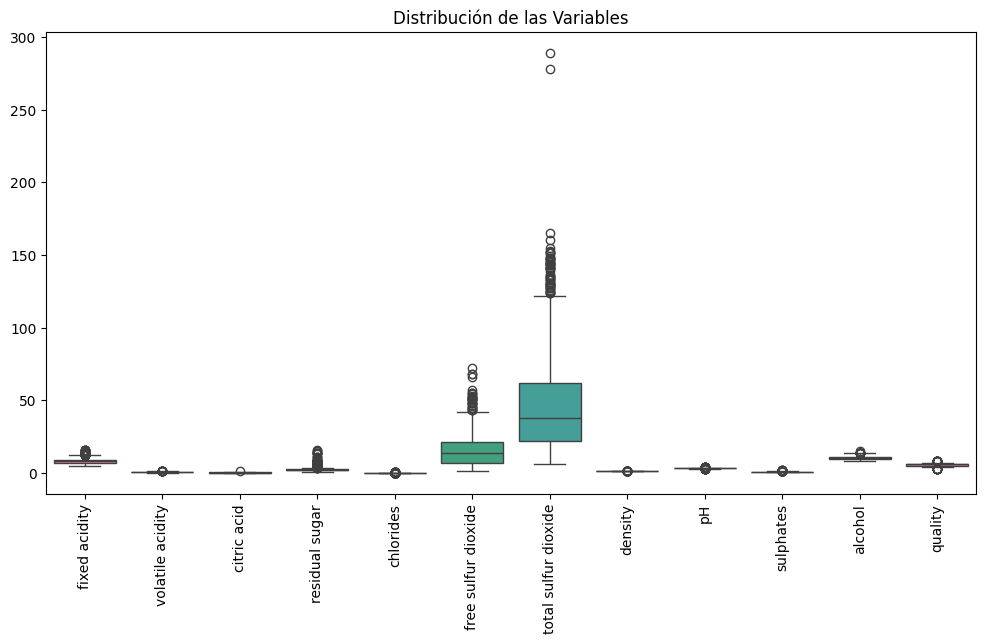

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Distribución de las Variables")
plt.show()


- "free sulfur dioxide" y "total sulfur dioxide" tienen muchos valores atípicos con valores elevados.
- Otras variables también presentan algunos outliers, pero en menor medida.
- La escala de las variables es muy diferente, lo que refuerza la necesidad de normalización o estandarización.

#### Tratar los valores atípicos

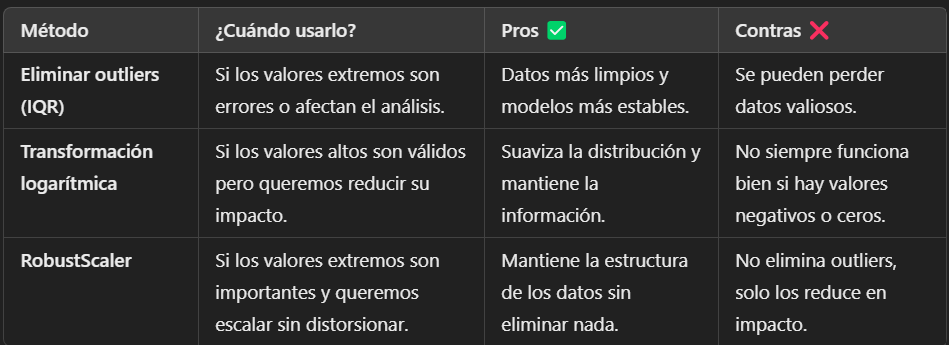



- Si los valores extremos parecen errores o ruido en los datos → Los eliminamos (IQR).
- Si son datos válidos y solo quieremos reducir su efecto → Usamos transformación logarítmica.
- Si quieremos conservar todos los datos pero escalarlos correctamente → Usamos RobustScaler.

##### Analizar que método nos viene mejor

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("dataset_wine/winequality-red.csv", sep=";")

# Copia del dataset original
df_original = df.copy()

# Separar features y target
X = df.drop(columns=["quality"])
y = df["quality"]

# ---- MÉTODO 1: ELIMINACIÓN DE OUTLIERS (IQR) ----
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
df_iqr = df[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
X_iqr = df_iqr.drop(columns=["quality"])
y_iqr = df_iqr["quality"]

# ---- MÉTODO 2: TRANSFORMACIÓN LOGARÍTMICA ----
#df_log = df.copy()
#X_log = np.log1p(X)  # log(1+x) para evitar log(0)
#y_log = y.copy()

# ---- MÉTODO 3: NORMALIZACIÓN CON RobustScaler ----
#scaler = RobustScaler()
#X_robust = scaler.fit_transform(X)
#y_robust = y.copy()

# Función para entrenar modelo y evaluar
#def evaluar_modelo(X, y, metodo):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #modelo = LinearRegression()
    #modelo.fit(X_train, y_train)
    #y_pred = modelo.predict(X_test)

    #rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    #r2 = r2_score(y_test, y_pred)

    #print(f"\nResultados para {metodo}:")
    #print(f"🔹 RMSE: {rmse:.4f}")
    #print(f"🔹 R²: {r2:.4f}")

# Evaluar cada método
#evaluar_modelo(X_iqr, y_iqr, "IQR (sin outliers)")
#evaluar_modelo(X_log, y_log, "Transformación Logarítmica")
#evaluar_modelo(X_robust, y_robust, "RobustScaler")


La eliminación de outliers en este caso es mejor.

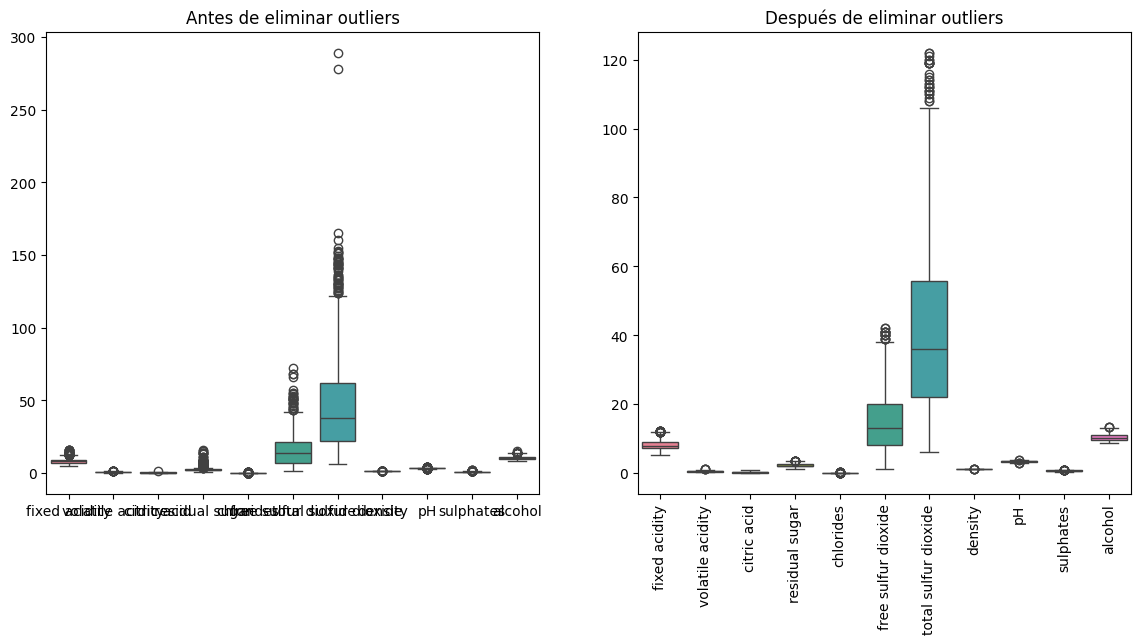

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=X, ax=axes[0])
axes[0].set_title("Antes de eliminar outliers")

sns.boxplot(data=X_iqr, ax=axes[1])
axes[1].set_title("Después de eliminar outliers")

plt.xticks(rotation=90)
plt.show()


Resultados para IQR (sin outliers):
- RMSE: 0.5763
- R²: 0.4230

Resultados para Transformación Logarítmica:
- RMSE: 0.6230
- R²: 0.4061

Resultados para RobustScaler:
- RMSE: 0.6245
- R²: 0.4032

- Eliminar outliers con IQR es la mejor opción en este caso, porque tiene el RMSE más bajo (menos error) y el R² más alto (explica más la varianza).
- Las transformaciones Log y RobustScaler no mejoran el rendimiento y hasta lo empeoran un poco.
- La diferencia no es enorme, pero el método IQR se destaca.

## 2.  Mostrar la matriz de correlación de variables

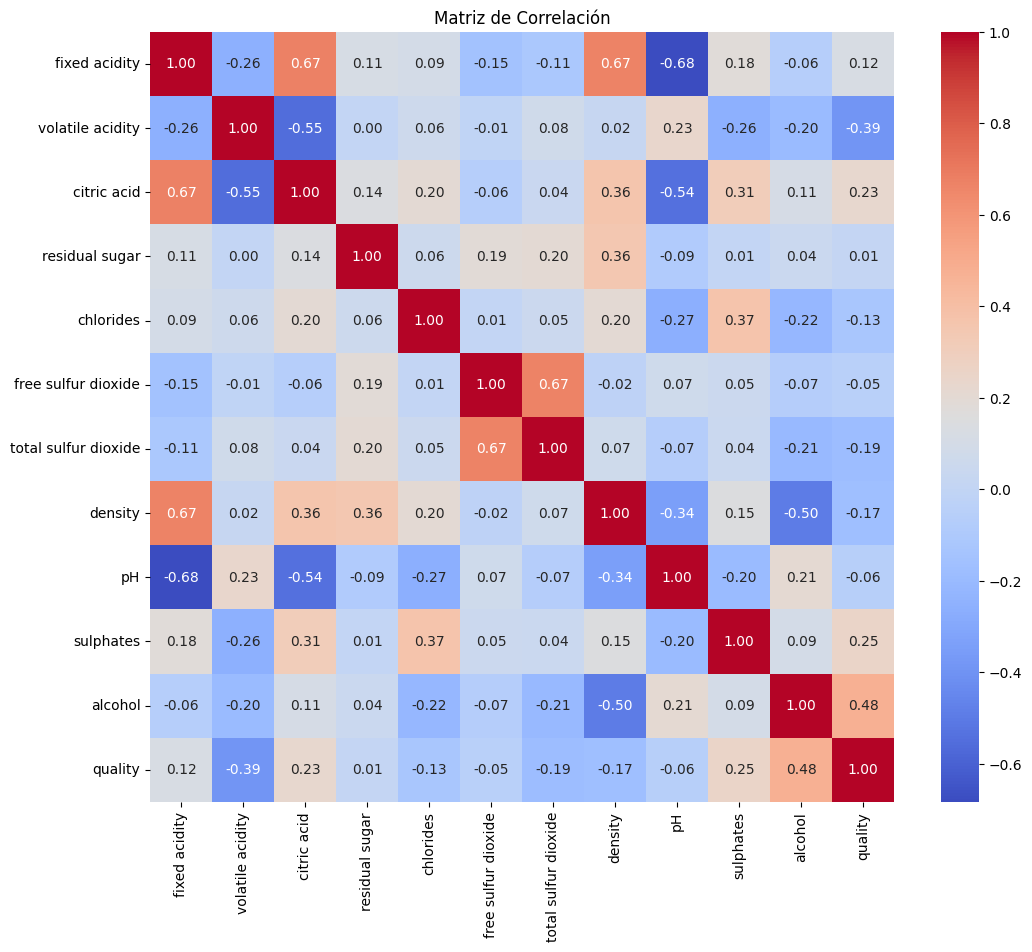

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


## 3. Otra técnica de selección de características

#### SelectKBest:

Aquí usamos SelectKBest con ANOVA F-value (porque la variable objetivo "quality" es categórica):

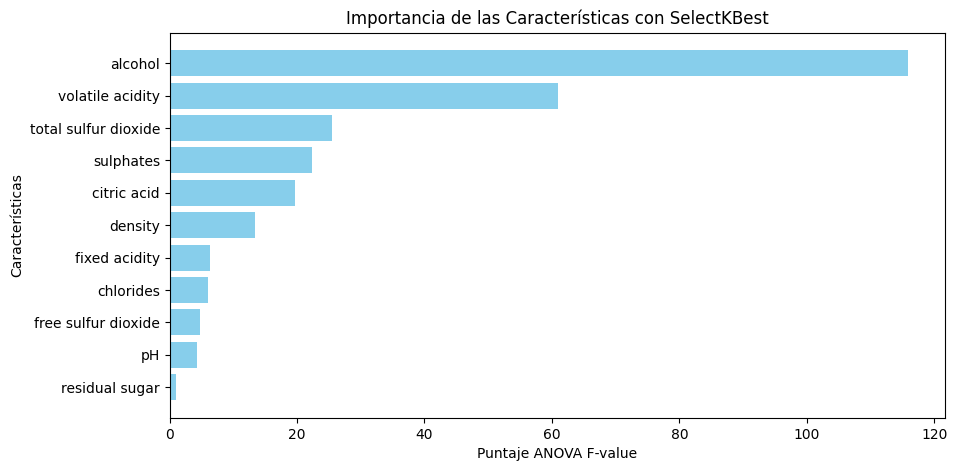

Top 5 Características Seleccionadas con SelectKBest:
                Feature  Importance
0               alcohol  115.854797
1      volatile acidity   60.913993
2  total sulfur dioxide   25.478510
3             sulphates   22.273376
4           citric acid   19.690664


In [9]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = df.drop("quality", axis=1)
y = df["quality"]

# Aplicar SelectKBest con ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)  # Seleccionamos las 5 mejores características
X_new = selector.fit_transform(X, y)

# Obtener los puntajes de importancia
scores = selector.scores_

# Ordenar las características según su puntaje
sorted_idx = np.argsort(scores)[::-1]  # Ordenamos de mayor a menor

# Graficar la importancia de las características
plt.figure(figsize=(10, 5))
plt.barh(X.columns[sorted_idx], scores[sorted_idx], color='skyblue')
plt.xlabel("Puntaje ANOVA F-value")
plt.ylabel("Características")
plt.title("Importancia de las Características con SelectKBest")
plt.gca().invert_yaxis()  # Para que la característica más importante esté en la parte superior
plt.show()

# Crear un DataFrame con las características seleccionadas y sus puntajes
top_features = pd.DataFrame({
    'Feature': X.columns[sorted_idx][:5],
    'Importance': scores[sorted_idx][:5]
})

# Mostrar la tabla de las características seleccionadas
print("Top 5 Características Seleccionadas con SelectKBest:")
print(top_features)




- Chi-cuadrado se usa cuando las características son categóricas (no es nuestro caso).
- ANOVA F-value mide la relación entre cada variable independiente y la variable objetivo "quality", siendo más adecuado aquí.

Esto nos ayuda a elegir solo las características más importantes y evitar ruido en el modelo.

#### Eliminación Recursiva de Características (RFE):

Otra técnica más robusta es Recursive Feature Elimination (RFE), que elimina características menos importantes usando un modelo base.

Top 5 características seleccionadas por RFE:
Index(['fixed acidity', 'volatile acidity', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
Top 5 Características Seleccionadas por RFE con su Importancia:
                Feature  Importance
7               alcohol    0.151698
6             sulphates    0.112402
3  total sulfur dioxide    0.103722
1      volatile acidity    0.100606
4               density    0.088905
2             chlorides    0.078535
0         fixed acidity    0.075535
5                    pH    0.075392


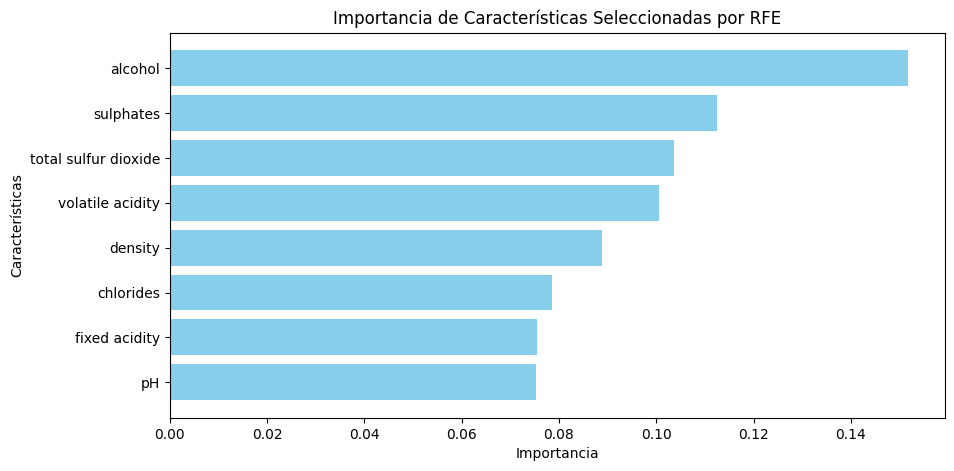

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# Usamos un RandomForestClassifier como estimador base
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Aplicar RFE para seleccionar las 5 mejores características
selector_rfe = RFE(estimator=model, n_features_to_select=8)
X_new = selector_rfe.fit_transform(X, y)

# Obtener nombres de las características seleccionadas
selected_features = X.columns[selector_rfe.support_]

# Mostrar las características seleccionadas
print("Top 5 características seleccionadas por RFE:")
print(selected_features)

# Obtener las importancias de las características desde el modelo de Random Forest
feature_importances = model.feature_importances_

# Filtrar solo las importancias de las características seleccionadas
selected_importances = feature_importances[selector_rfe.support_]

# Crear un DataFrame con los resultados
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_importances
}).sort_values(by='Importance', ascending=False)  # Ordenar de mayor a menor importancia

# Mostrar el DataFrame con las características seleccionadas y su importancia
print("Top 5 Características Seleccionadas por RFE con su Importancia:")
print(feature_importance_df)

# Graficar la importancia de las características seleccionadas
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características Seleccionadas por RFE")
plt.gca().invert_yaxis()  # Para que la más importante aparezca arriba
plt.show()



- El dataset tiene relaciones no lineales
 - SelectKBest con ANOVA F-value solo detecta relaciones lineales entre cada variable y la variable objetivo (quality).
 - RFE con RandomForest evalúa interacciones complejas y no lineales entre variables, lo que es crucial para un dataset como este.

- Las características están altamente correlacionadas
 - Algunas variables en el dataset tienen alta correlación (ej., total sulfur dioxide vs. free sulfur dioxide).
 - RFE ayuda a eliminar variables redundantes y dependientes, mientras que SelectKBest selecciona características sin considerar su redundancia.

- RandomForest maneja mejor los valores discretos de 'quality'
 - Quality es una variable ordinal (3-8), por lo que un modelo basado en árboles maneja mejor este tipo de datos que un método estadístico puro como ANOVA F-value.

 Si el dataset fuera muy grande, podríamos considerar PCA para reducir la dimensionalidad, pero en este caso RFE es más efectivo.

## 4. Realizar una comparativa de la precisión en el entrenamiento de los diferentes modelos de NaivaBayes y KNN, aplicando Cross Validation.

Para esta comparativa sólo vamos a usar GaussianNB ya que los demás modelos dieron peores resultados.  


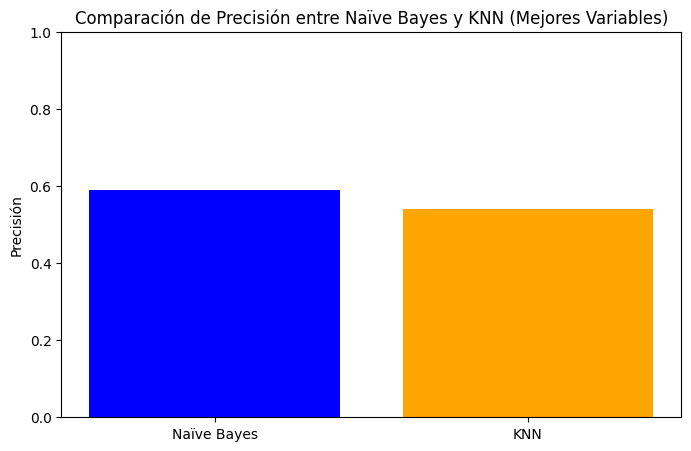

Naïve Bayes Accuracy: 0.5903616352201257
KNN Accuracy: 0.5409709119496855


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# Definir las mejores características según RFE
#selected_features = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'fixed acidity', 'chlorides', 'pH']
selected_features = ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']

# Utilizar solo las características seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Definir los modelos
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=5)

# Aplicar validación cruzada
nb_scores = cross_val_score(nb_model, X_scaled, y, cv=10, scoring='accuracy')
knn_scores = cross_val_score(knn_model, X_scaled, y, cv=10, scoring='accuracy')

# Calcular la media de precisión
nb_mean = np.mean(nb_scores)
knn_mean = np.mean(knn_scores)

# Crear gráfico de comparación
models = ['Naïve Bayes', 'KNN']
accuracies = [nb_mean, knn_mean]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Precisión')
plt.title('Comparación de Precisión entre Naïve Bayes y KNN (Mejores Variables)')
plt.show()

# Imprimir resultados
print("Naïve Bayes Accuracy:", nb_mean)
print("KNN Accuracy:", knn_mean)



## 5. Con el modelo Guissian de Naive Bayes

### 5.1. Entrenarlo y obtener la matriz de confusión

Cross-Validation Accuracy Scores: [0.578125   0.578125   0.628125   0.584375   0.61128527]
Mean Accuracy: 0.596007053291536
Standard Deviation: 0.020198151509173704

Test Set Accuracy: 0.55625

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.74      0.68       130
           6       0.53      0.55      0.54       132
           7       0.34      0.24      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.25      0.25      0.25       320
weighted avg       0.52      0.56      0.54       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


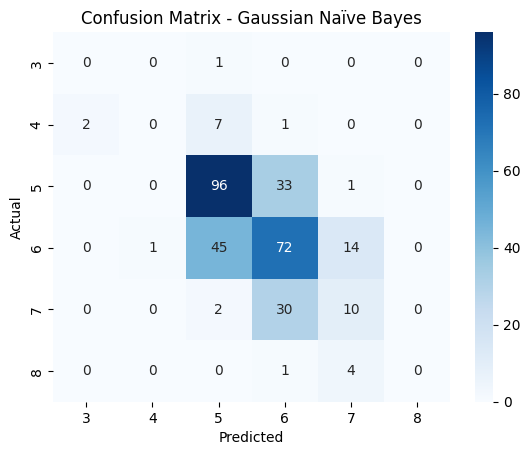

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir las mejores características según RFE
selected_features = ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']

# Utilizar solo las características seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo GaussianNB
nb_model = GaussianNB()

# Validación cruzada
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento
nb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Naïve Bayes')
plt.show()


1. Validación cruzada
Cross-Validation Accuracy Scores: [0.5781, 0.5781, 0.6281, 0.5843, 0.6113]
Media de precisión (Mean Accuracy): 0.5960 (≈ 59.6%)
Desviación estándar: 0.0202 (≈ 2%)
Esto indica que, en promedio, el modelo Naïve Bayes tiene una precisión del 59.6% en la validación cruzada con una variación baja entre las pruebas.

2. Precisión en el conjunto de prueba
Test Set Accuracy: 0.5562 (≈ 55.6%)
Esto significa que el modelo tiene un desempeño ligeramente peor en los datos de prueba que en la validación cruzada.

3. Informe de clasificación (Classification Report)
- Clase "5" (mayoría de datos):

  - Precisión (Precision): 0.64
 - Recall: 0.74
 - F1-score: 0.68
- → El modelo predice bien esta clase.


- Clase "6":
 - Precisión: 0.53
 - Recall: 0.55
 - F1-score: 0.54
- → Regular desempeño.

Otras clases (3, 4, 7, 8) tienen precisión 0.00 porque el modelo no predijo ejemplos para esas clases.


El Warning en precision indica que algunas clases no tienen predicciones, lo cual sugiere que Naïve Bayes no maneja bien la distribución de los datos en este caso.

#### Ajustar el modelo Naïve Bayes con var_smoothing para mejor manejo de probabilidades pequeñas.

Cross-Validation Accuracy Scores: [0.54375    0.55625    0.61875    0.565625   0.60501567]
Mean Accuracy: 0.5778781347962382
Standard Deviation: 0.028946849604123

Test Set Accuracy: 0.5625

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.10      0.14        10
           5       0.64      0.76      0.70       130
           6       0.54      0.53      0.53       132
           7       0.32      0.24      0.27        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.29      0.27      0.27       320
weighted avg       0.53      0.56      0.54       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


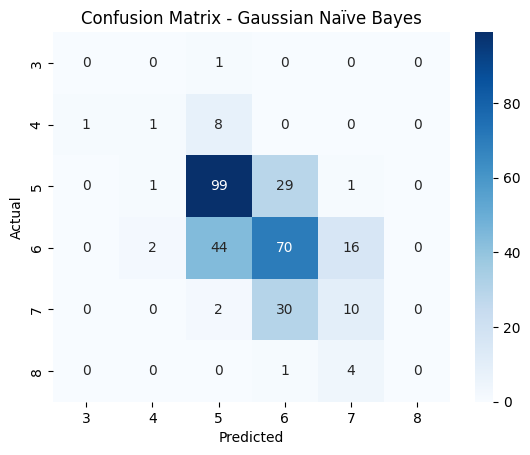

In [13]:
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir las mejores características según RFE
selected_features = ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']

# Utilizar solo las características seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo GaussianNB con ajuste de var_smoothing
nb_model = GaussianNB(var_smoothing=1e-3)

# Validación cruzada
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento
nb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Naïve Bayes')
plt.show()
"""

No resulta en este caso, habrá que probar con otro modelo diferente.

#### Rebalanceo de clases (SMOTE, sobremuestreo/submuestreo)

Voy a implementar el rebalanceo de clases utilizando SMOTE (Synthetic Minority Over-sampling Technique) para aumentar la cantidad de datos en las clases minoritarias antes de entrenar el modelo.

Cross-Validation Accuracy Scores: [0.51376147 0.49541284 0.53058104 0.46330275 0.51529052]
Mean Accuracy: 0.5036697247706422
Standard Deviation: 0.023059807365760056

Test Set Accuracy: 0.353125

Classification Report:
               precision    recall  f1-score   support

           3       0.02      0.50      0.04         2
           4       0.03      0.09      0.04        11
           5       0.67      0.38      0.49       136
           6       0.51      0.30      0.38       128
           7       0.35      0.47      0.40        40
           8       0.04      0.33      0.06         3

    accuracy                           0.35       320
   macro avg       0.27      0.35      0.24       320
weighted avg       0.53      0.35      0.41       320



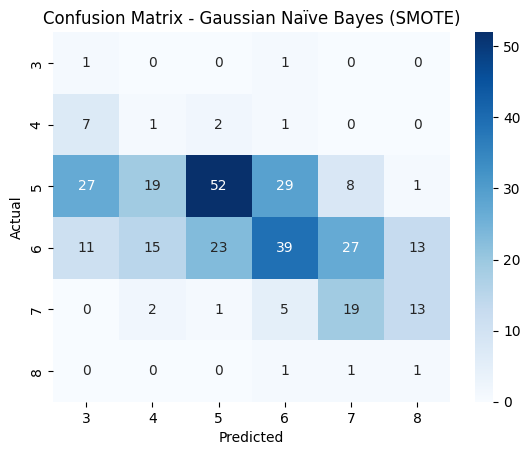

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Definir las mejores características según RFE
selected_features = ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']

# Utilizar solo las características seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Definir el modelo GaussianNB con ajuste de var_smoothing
nb_model = GaussianNB(var_smoothing=1e-3)

# Validación cruzada
cv_scores = cross_val_score(nb_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento balanceado
nb_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones
y_pred = nb_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Naïve Bayes (SMOTE)')
plt.show()


#### KNN

KNN - Cross-Validation Accuracy Scores: [0.6171875  0.5859375  0.62890625 0.57421875 0.57647059]
KNN - Mean Accuracy: 0.5965441176470587
KNN - Standard Deviation: 0.022303927039565165

KNN - Test Set Accuracy: 0.609375

KNN - Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.09      0.17        11
           5       0.66      0.74      0.70       136
           6       0.57      0.62      0.59       128
           7       0.54      0.35      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.46      0.30      0.31       320
weighted avg       0.61      0.61      0.59       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


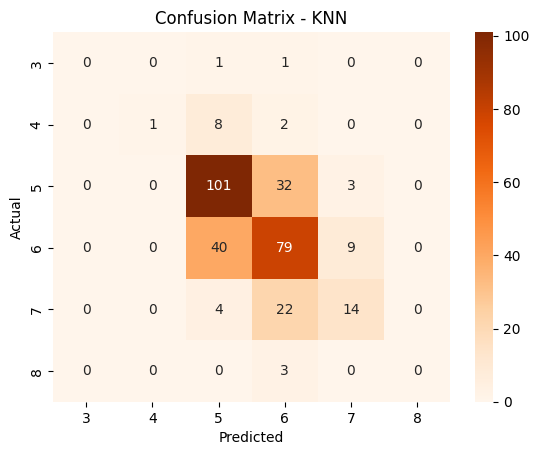

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Definir las mejores características según RFE
selected_features = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

# Utilizar solo las características seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Definir modelo
knn_model = KNeighborsClassifier(n_neighbors=5)

# Validación cruzada KNN
cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
print("KNN - Cross-Validation Accuracy Scores:", cv_scores_knn)
print("KNN - Mean Accuracy:", np.mean(cv_scores_knn))
print("KNN - Standard Deviation:", np.std(cv_scores_knn))

# Entrenar modelos con el conjunto de entrenamiento
knn_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluar modelos
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nKNN - Test Set Accuracy:", accuracy_knn)
print("\nKNN - Classification Report:\n", classification_report(y_test, y_pred_knn))

# Matriz de confusión KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


#### KNN con SMOTE

KNN - Cross-Validation Accuracy Scores: [0.77370031 0.77217125 0.79969419 0.76911315 0.78134557]
KNN - Mean Accuracy: 0.7792048929663609
KNN - Standard Deviation: 0.011009174311926637

KNN - Test Set Accuracy: 0.515625

KNN - Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.16      0.64      0.26        11
           5       0.73      0.57      0.64       136
           6       0.65      0.48      0.55       128
           7       0.35      0.45      0.40        40
           8       0.12      0.67      0.21         3

    accuracy                           0.52       320
   macro avg       0.34      0.47      0.34       320
weighted avg       0.62      0.52      0.55       320



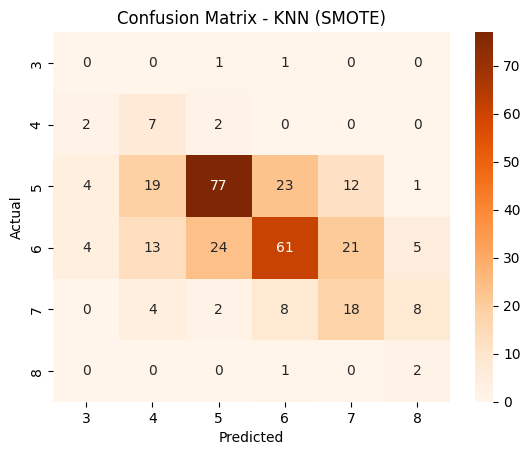

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Definir las mejores características según RFE
selected_features = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

# Utilizar solo las características seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)

# Validación cruzada KNN
cv_scores_knn = cross_val_score(knn_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("KNN - Cross-Validation Accuracy Scores:", cv_scores_knn)
print("KNN - Mean Accuracy:", np.mean(cv_scores_knn))
print("KNN - Standard Deviation:", np.std(cv_scores_knn))

# Entrenar modelos con el conjunto de entrenamiento balanceado
knn_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluar modelos
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nKNN - Test Set Accuracy:", accuracy_knn)
print("\nKNN - Classification Report:\n", classification_report(y_test, y_pred_knn))

# Matriz de confusión KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN (SMOTE)')
plt.show()


Nos quedamos con el modelo KNN con SMOTE

### 5.2. Exportar a un fichero los parámetros del modelo entrenado.


Diferencias entre los formatos de guardado:

- pkl (joblib.dump) → Guarda el modelo completo para reutilizarlo después (ideal para predicciones futuras).
- csv → Guarda solo los parámetros del modelo en formato legible.

#### PKl

In [25]:
import joblib

# Guardar el modelo KNN entrenado
joblib.dump(knn_model, 'knn_model.pkl')

# Guardar el scaler utilizado para normalizar los datos
joblib.dump(scaler, 'scaler.pkl')

print("Modelo KNN y scaler guardados exitosamente.")

Modelo KNN y scaler guardados exitosamente.


#### CSV

In [26]:
import pandas as pd

# Obtener los parámetros del modelo KNN
knn_params = knn_model.get_params()

# Convertirlos en un DataFrame y guardarlos en CSV
df_params = pd.DataFrame(list(knn_params.items()), columns=['Parameter', 'Value'])
df_params.to_csv('knn_model_params.csv', index=False)

print("Parámetros del modelo KNN guardados en 'knn_model_params.csv'")


Parámetros del modelo KNN guardados en 'knn_model_params.csv'


#### Ver los archivos

Los archivos .pkl y .csv se guardan en el directorio donde ejecutes el script, que en Google Colab es el directorio raíz de tu sesión temporal (/content/).

In [27]:
import os
print(os.listdir())

['.config', 'scaler.pkl', 'knn_model_params.csv', 'knn_model.pkl', 'dataset_wine', 'sample_data']


### 5.3. Importar los parámetros del modelo

In [28]:
import joblib

# Cargar el modelo KNN entrenado
knn_model = joblib.load('knn_model.pkl')

# Cargar el scaler utilizado para normalizar los datos
scaler = joblib.load('scaler.pkl')

print("Modelo KNN y scaler cargados exitosamente.")


Modelo KNN y scaler cargados exitosamente.


### 5.4. Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusión.


KNN - Accuracy for All Data: 0.6279

KNN - Classification Report (All Data):
               precision    recall  f1-score   support

           3       0.17      0.80      0.28        10
           4       0.21      0.91      0.34        53
           5       0.80      0.62      0.70       681
           6       0.76      0.54      0.63       638
           7       0.57      0.80      0.67       199
           8       0.28      0.94      0.44        18

    accuracy                           0.63      1599
   macro avg       0.47      0.77      0.51      1599
weighted avg       0.73      0.63      0.65      1599



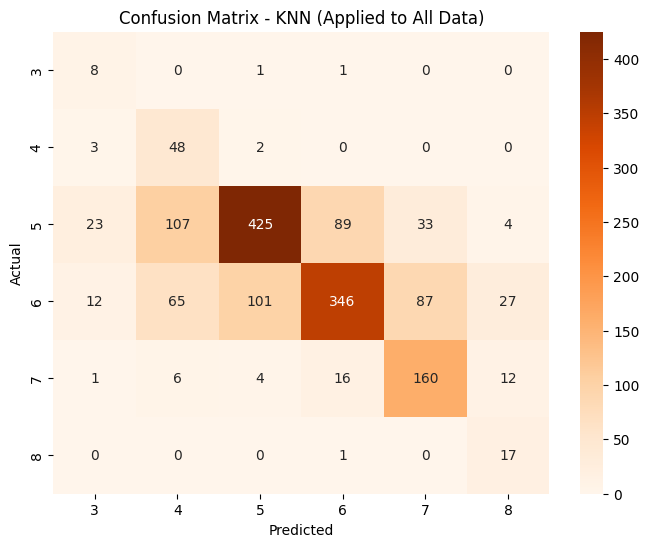


Class 3:
  Precision: 0.1702
  Recall: 0.8000
  F1-score: 0.2807

Class 4:
  Precision: 0.2124
  Recall: 0.9057
  F1-score: 0.3441

Class 5:
  Precision: 0.7974
  Recall: 0.6241
  F1-score: 0.7002

Class 6:
  Precision: 0.7638
  Recall: 0.5423
  F1-score: 0.6343

Class 7:
  Precision: 0.5714
  Recall: 0.8040
  F1-score: 0.6681

Class 8:
  Precision: 0.2833
  Recall: 0.9444
  F1-score: 0.4359


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Realizar predicciones sobre todo el dataset
y_pred_all = knn_model.predict(X_selected_scaled)

# Evaluar el accuracy
accuracy_all = accuracy_score(y, y_pred_all)
print(f"\nKNN - Accuracy for All Data: {accuracy_all:.4f}")

# Obtener el reporte de clasificación completo
class_report_all = classification_report(y, y_pred_all)
print("\nKNN - Classification Report (All Data):\n", class_report_all)

# Calcular la matriz de confusión
conf_matrix_all = confusion_matrix(y, y_pred_all)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_all, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN (Applied to All Data)')
plt.show()

# Calcular métricas adicionales
# Precision, Recall, F1-score para cada clase
precision_all = np.diagonal(conf_matrix_all) / np.sum(conf_matrix_all, axis=0)
recall_all = np.diagonal(conf_matrix_all) / np.sum(conf_matrix_all, axis=1)
f1_all = 2 * (precision_all * recall_all) / (precision_all + recall_all)

# Mostrar métricas de precisión, recall y F1-score por clase
for label, precision, recall, f1 in zip(np.unique(y), precision_all, recall_all, f1_all):
    print(f"\nClass {label}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")


## 6. Comparar el resultado obtenido con el valor de calidad indicado en el dataset por medio de una matriz de confusión

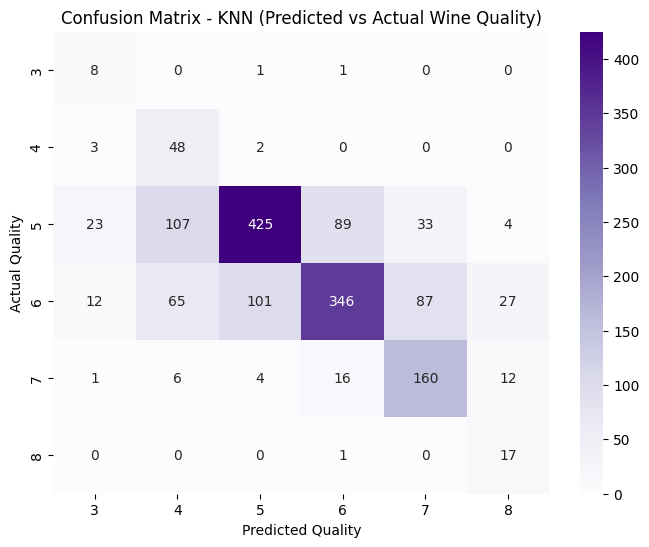


KNN - Classification Report (Comparison with Actual Quality):
               precision    recall  f1-score   support

           3       0.17      0.80      0.28        10
           4       0.21      0.91      0.34        53
           5       0.80      0.62      0.70       681
           6       0.76      0.54      0.63       638
           7       0.57      0.80      0.67       199
           8       0.28      0.94      0.44        18

    accuracy                           0.63      1599
   macro avg       0.47      0.77      0.51      1599
weighted avg       0.73      0.63      0.65      1599



In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusión entre las predicciones y los valores reales
conf_matrix_quality = confusion_matrix(y, y_pred_all)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_quality, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix - KNN (Predicted vs Actual Wine Quality)')
plt.show()

# Mostrar también el reporte de clasificación para mayor contexto
print("\nKNN - Classification Report (Comparison with Actual Quality):\n", classification_report(y, y_pred_all))


 - Matriz de Confusión: Compara las etiquetas predichas (y_pred_all) con las etiquetas reales (y), mostrando cuántas veces el modelo predijo correctamente o incorrectamente cada clase de calidad.
 - Visualización: Utilizamos un gráfico de calor con seaborn para mostrar la matriz de confusión.
 - Reporte de Clasificación: También mostramos el reporte de clasificación, que proporciona detalles sobre las métricas de rendimiento (precisión, recall, F1-score) para cada clase de calidad.


1. Clasificación de Calidad del Vino:

    El modelo ha predicho las calidades de vino (clases 3 a 8) con distintas métricas de precisión, recall y F1-score.

    Para cada clase:
  - Precisión (Precision): Es la proporción de predicciones correctas para cada clase en relación con el total de predicciones de esa clase. Por ejemplo, para la clase 3, la precisión es 0.17, lo que significa que solo el 17% de las veces que el modelo predijo la clase 3, estaba en lo correcto.

  - Recall: Es la proporción de verdaderos positivos con respecto al total de elementos reales de esa clase. Por ejemplo, para la clase 3, el recall es 0.80, lo que significa que el 80% de las veces que la clase 3 estuvo presente, el modelo la identificó correctamente.

  - F1-Score: Es la media armónica entre precisión y recall. Ofrece un equilibrio entre ambos. Para la clase 3, el F1-score es 0.28, que refleja un rendimiento relativamente bajo en cuanto a balancear precisión y recall.

  Resultados generales:
  - Accuracy (Precisión Global): La precisión global del modelo es 0.63 o 63%, lo que indica que el modelo acierta el 63% de las veces en todo el conjunto de datos.

  - Macro Average: Es un promedio sin ponderación, que calcula la precisión, recall y F1-score para cada clase sin tener en cuenta el número de ejemplos por clase. En tu caso, la precisión promedio es 0.47, el recall promedio es 0.77, y el F1-score promedio es 0.51.

  - Weighted Average: Es un promedio ponderado por la cantidad de muestras en cada clase. Aquí, la precisión ponderada es 0.73, el recall ponderado es 0.63, y el F1-score ponderado es 0.65. Estos valores reflejan un rendimiento más realista considerando que algunas clases (como la clase 5) tienen más muestras que otras.

2. Análisis de Resultados:

    - Clases con buen desempeño: Las clases con un buen desempeño incluyen las de calidad 5, 6 y 7, donde la precisión y recall son relativamente altas. Por ejemplo:

     - Clase 5: Tiene una precisión de 0.80, un recall de 0.62, y un F1-score de 0.70, lo que indica que el modelo está acertando en una proporción significativa de los casos y que su desempeño es sólido para esta clase.

     - Clase 6: Tiene una precisión de 0.76 y un recall de 0.54, lo que significa que el modelo está mejor en la identificación de esta clase, aunque tiene algunas dificultades para cubrir todos los casos posibles.

    - Clases con bajo desempeño: Algunas clases, como la clase 3, presentan bajo desempeño en términos de precisión y F1-score:

     - Clase 3: Tiene una precisión de 0.17 y un F1-score de 0.28, lo que refleja que el modelo tiene dificultades para predecir correctamente esta clase, a pesar de que el recall es relativamente alto.
3. Conclusiones:

    El modelo muestra un buen desempeño en clases con más frecuencia (como las clases 5 y 6), pero tiene dificultades para predecir correctamente las clases menos representadas, como la clase 3. Esto es común cuando los datos están desbalanceados.

    La precisión global de 0.63 es aceptable, pero el modelo podría beneficiarse de un enfoque de mejora en la predicción de clases minoritarias o de un mejor manejo de clases desbalanceadas. Métodos como SMOTE (que ya aplicamos) y ajustes de los parámetros de KNN pueden ayudar a mejorar este desequilibrio.

### 6.1. Obtener la precisión del resultado obtenido, para determinar si coincide con la precisión que se calculó durante el entrenamiento

In [38]:
from sklearn.metrics import accuracy_score

# Obtener la precisión del modelo para todo el conjunto de datos
accuracy_all_data = accuracy_score(y, y_pred_all)

# Mostrar la precisión obtenida en todo el conjunto de datos
print(f"KNN - Accuracy for All Data: {accuracy_all_data:.4f}")

# Comparar con la precisión obtenida en la validación cruzada durante el entrenamiento
# Utilizamos la media de las precisiones obtenidas durante la validación cruzada
mean_cv_accuracy = np.mean(cv_scores_knn)

# Mostrar la precisión obtenida durante la validación cruzada
print(f"KNN - Mean Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")

# Comparar si la precisión obtenida en el conjunto completo es similar a la de la validación cruzada
if np.isclose(accuracy_all_data, mean_cv_accuracy, atol=0.05):
    print("La precisión obtenida en el conjunto completo es consistente con la precisión de la validación cruzada.")
else:
    print("La precisión obtenida en el conjunto completo difiere de la precisión de la validación cruzada.")


KNN - Accuracy for All Data: 0.6279
KNN - Mean Cross-Validation Accuracy: 0.7792
La precisión obtenida en el conjunto completo difiere de la precisión de la validación cruzada.


## 7. Probar a utilizar el cuaderno con el dataset de los vinos blancos y realizar captura de los resultados obtenidos. (utilizar el dataset winequality-white.csv)
